In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/Cleaned_car_data.csv')
df.head(2)

,brand,model,color,year,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,price_in_euro
0,hyundai,Hyundai i10,black,2018,49.0,67.0,Manual,Petrol,4.6,106.0,27782.0,11555.0
1,honda,Honda CR-V,red,2018,114.0,155.0,Automatic,Petrol,7.5,175.0,57000.0,24490.0


In [ ]:
df.shape

(84406, 12)

In [ ]:
data=df[df['year']>=2015]#use for model training
data.head(2)

,brand,model,color,year,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,price_in_euro
0,hyundai,Hyundai i10,black,2018,49.0,67.0,Manual,Petrol,4.6,106.0,27782.0,11555.0
1,honda,Honda CR-V,red,2018,114.0,155.0,Automatic,Petrol,7.5,175.0,57000.0,24490.0


In [ ]:
data['year'].unique()

array([2018, 2023, 2019, 2022, 2021, 2016, 2015, 2020, 2017])

In [ ]:
data.shape

(57419, 12)

In [ ]:
len(df)-len(data)

26987

In [ ]:
#df['Car_age']=datetime.now().year-df['year']
#df.head(2)

In [ ]:
()

()

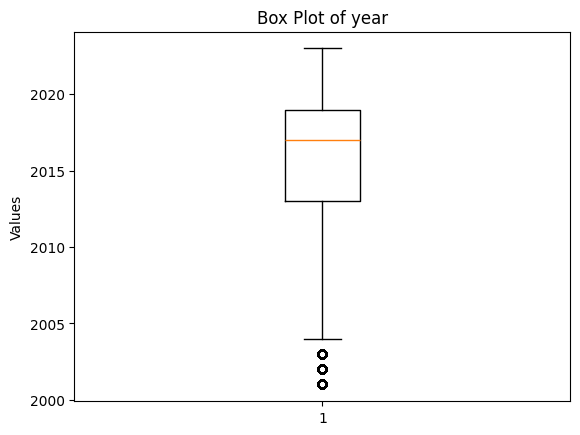

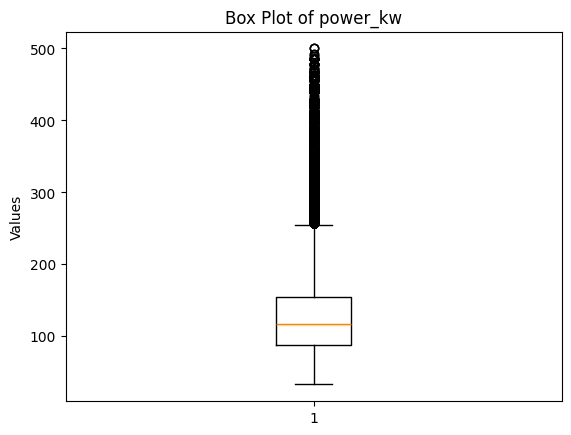

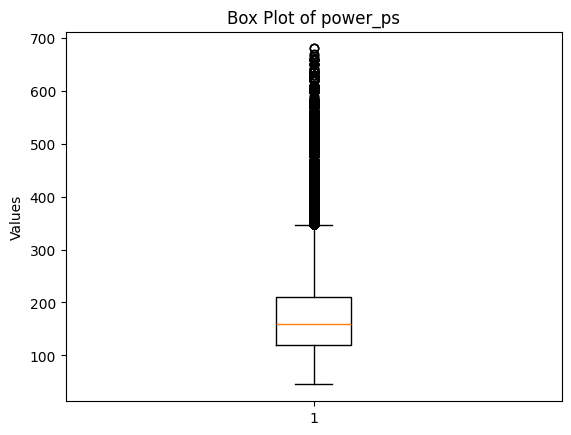

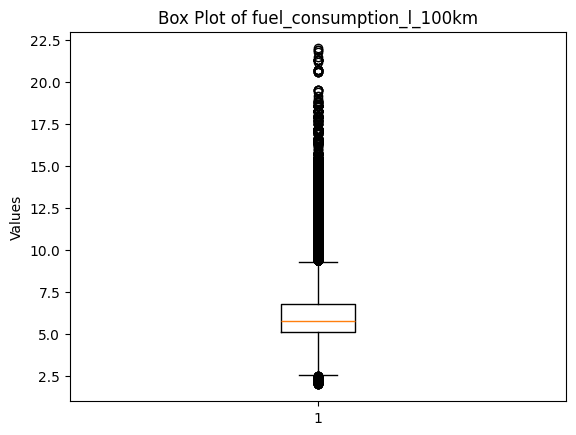

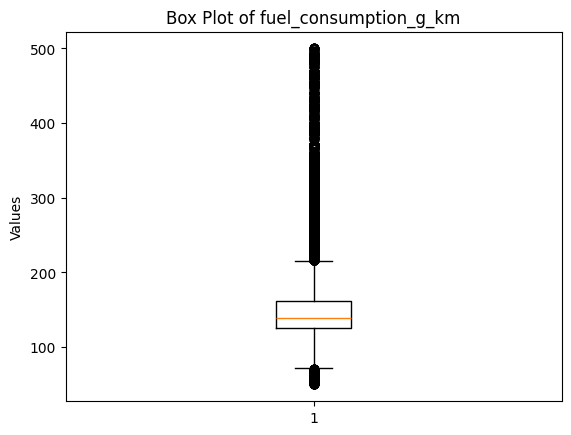

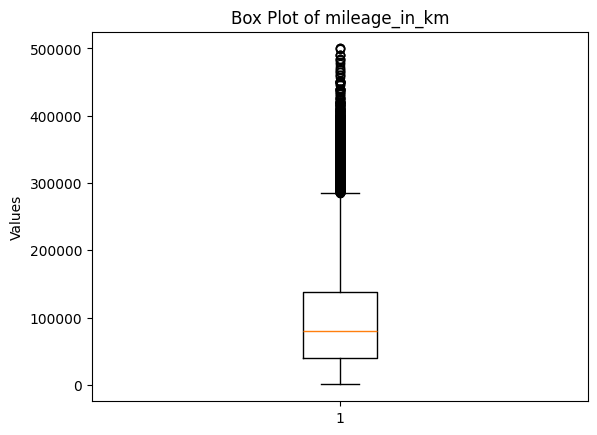

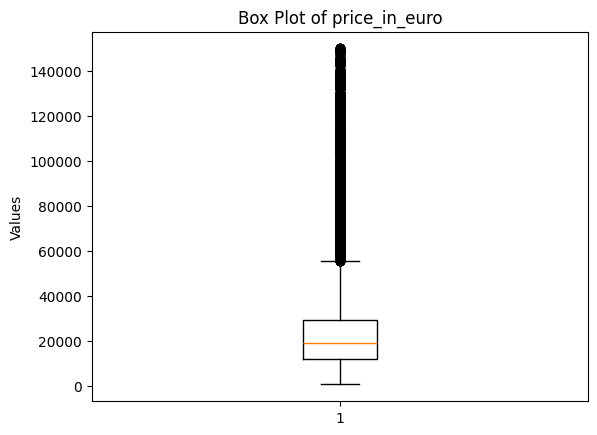

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns

for i in numerical_cols:
    plt.boxplot(df[i])
    plt.title(f'Box Plot of {i}')
    plt.ylabel('Values')
    plt.show()

<Axes: ylabel='price_in_euro'>

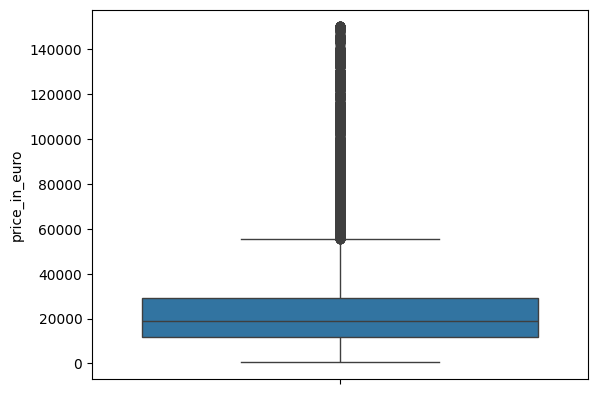

In [ ]:
sns.boxplot(df['price_in_euro'])

In [ ]:
two=df[df['price_in_euro']<=50000]
two.shape#final data

(77798, 12)

<Axes: ylabel='price_in_euro'>

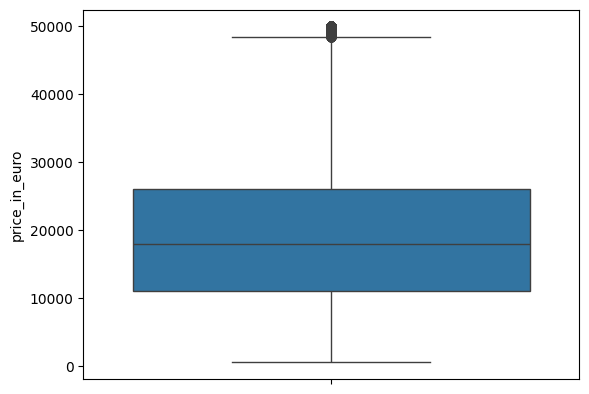

In [ ]:
sns.boxplot(two['price_in_euro'])

In [ ]:
len(df)-len(two)  #to removeoutlier

6608

In [ ]:
85258-78612

6646

Univariant

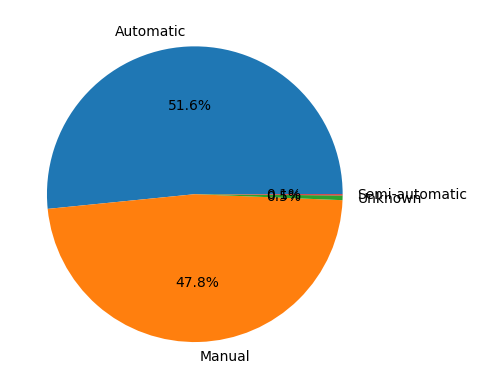

In [ ]:
value=df['transmission_type'].value_counts()
label=df['transmission_type'].value_counts().index
plt.pie(value,labels=label,autopct='%1.1f%%')

plt.show()#transmission_type

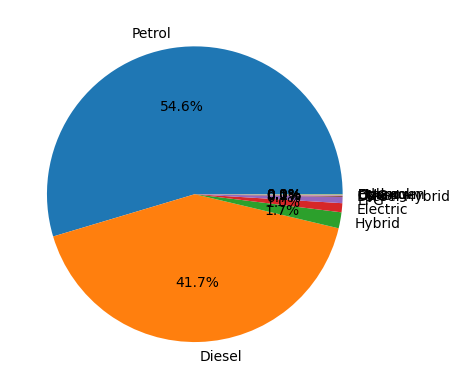

In [ ]:
plt.pie(df['fuel_type'].value_counts(),labels=df['fuel_type'].value_counts().index,autopct='%1.1f%%')
plt.show()#fuel

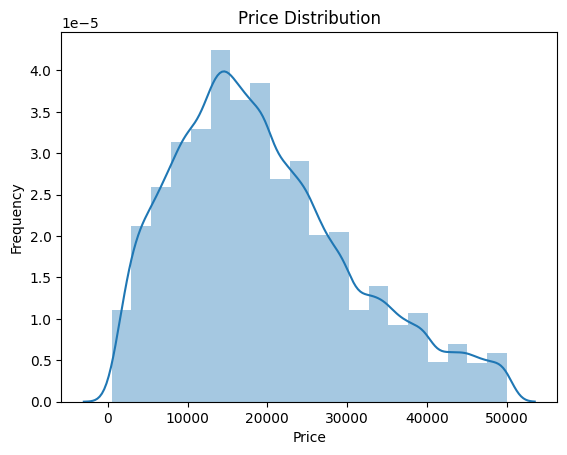

In [ ]:
sns.distplot(two['price_in_euro'],bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()#price

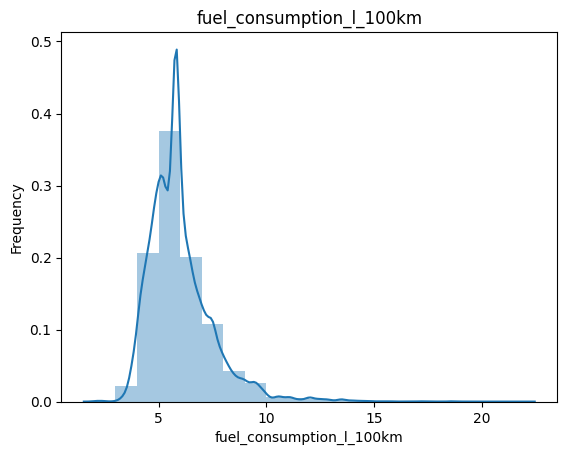

In [ ]:
sns.distplot(two['fuel_consumption_l_100km'],bins=20)
plt.xlabel('fuel_consumption_l_100km')
plt.ylabel('Frequency')
plt.title('fuel_consumption_l_100km')
plt.show()#

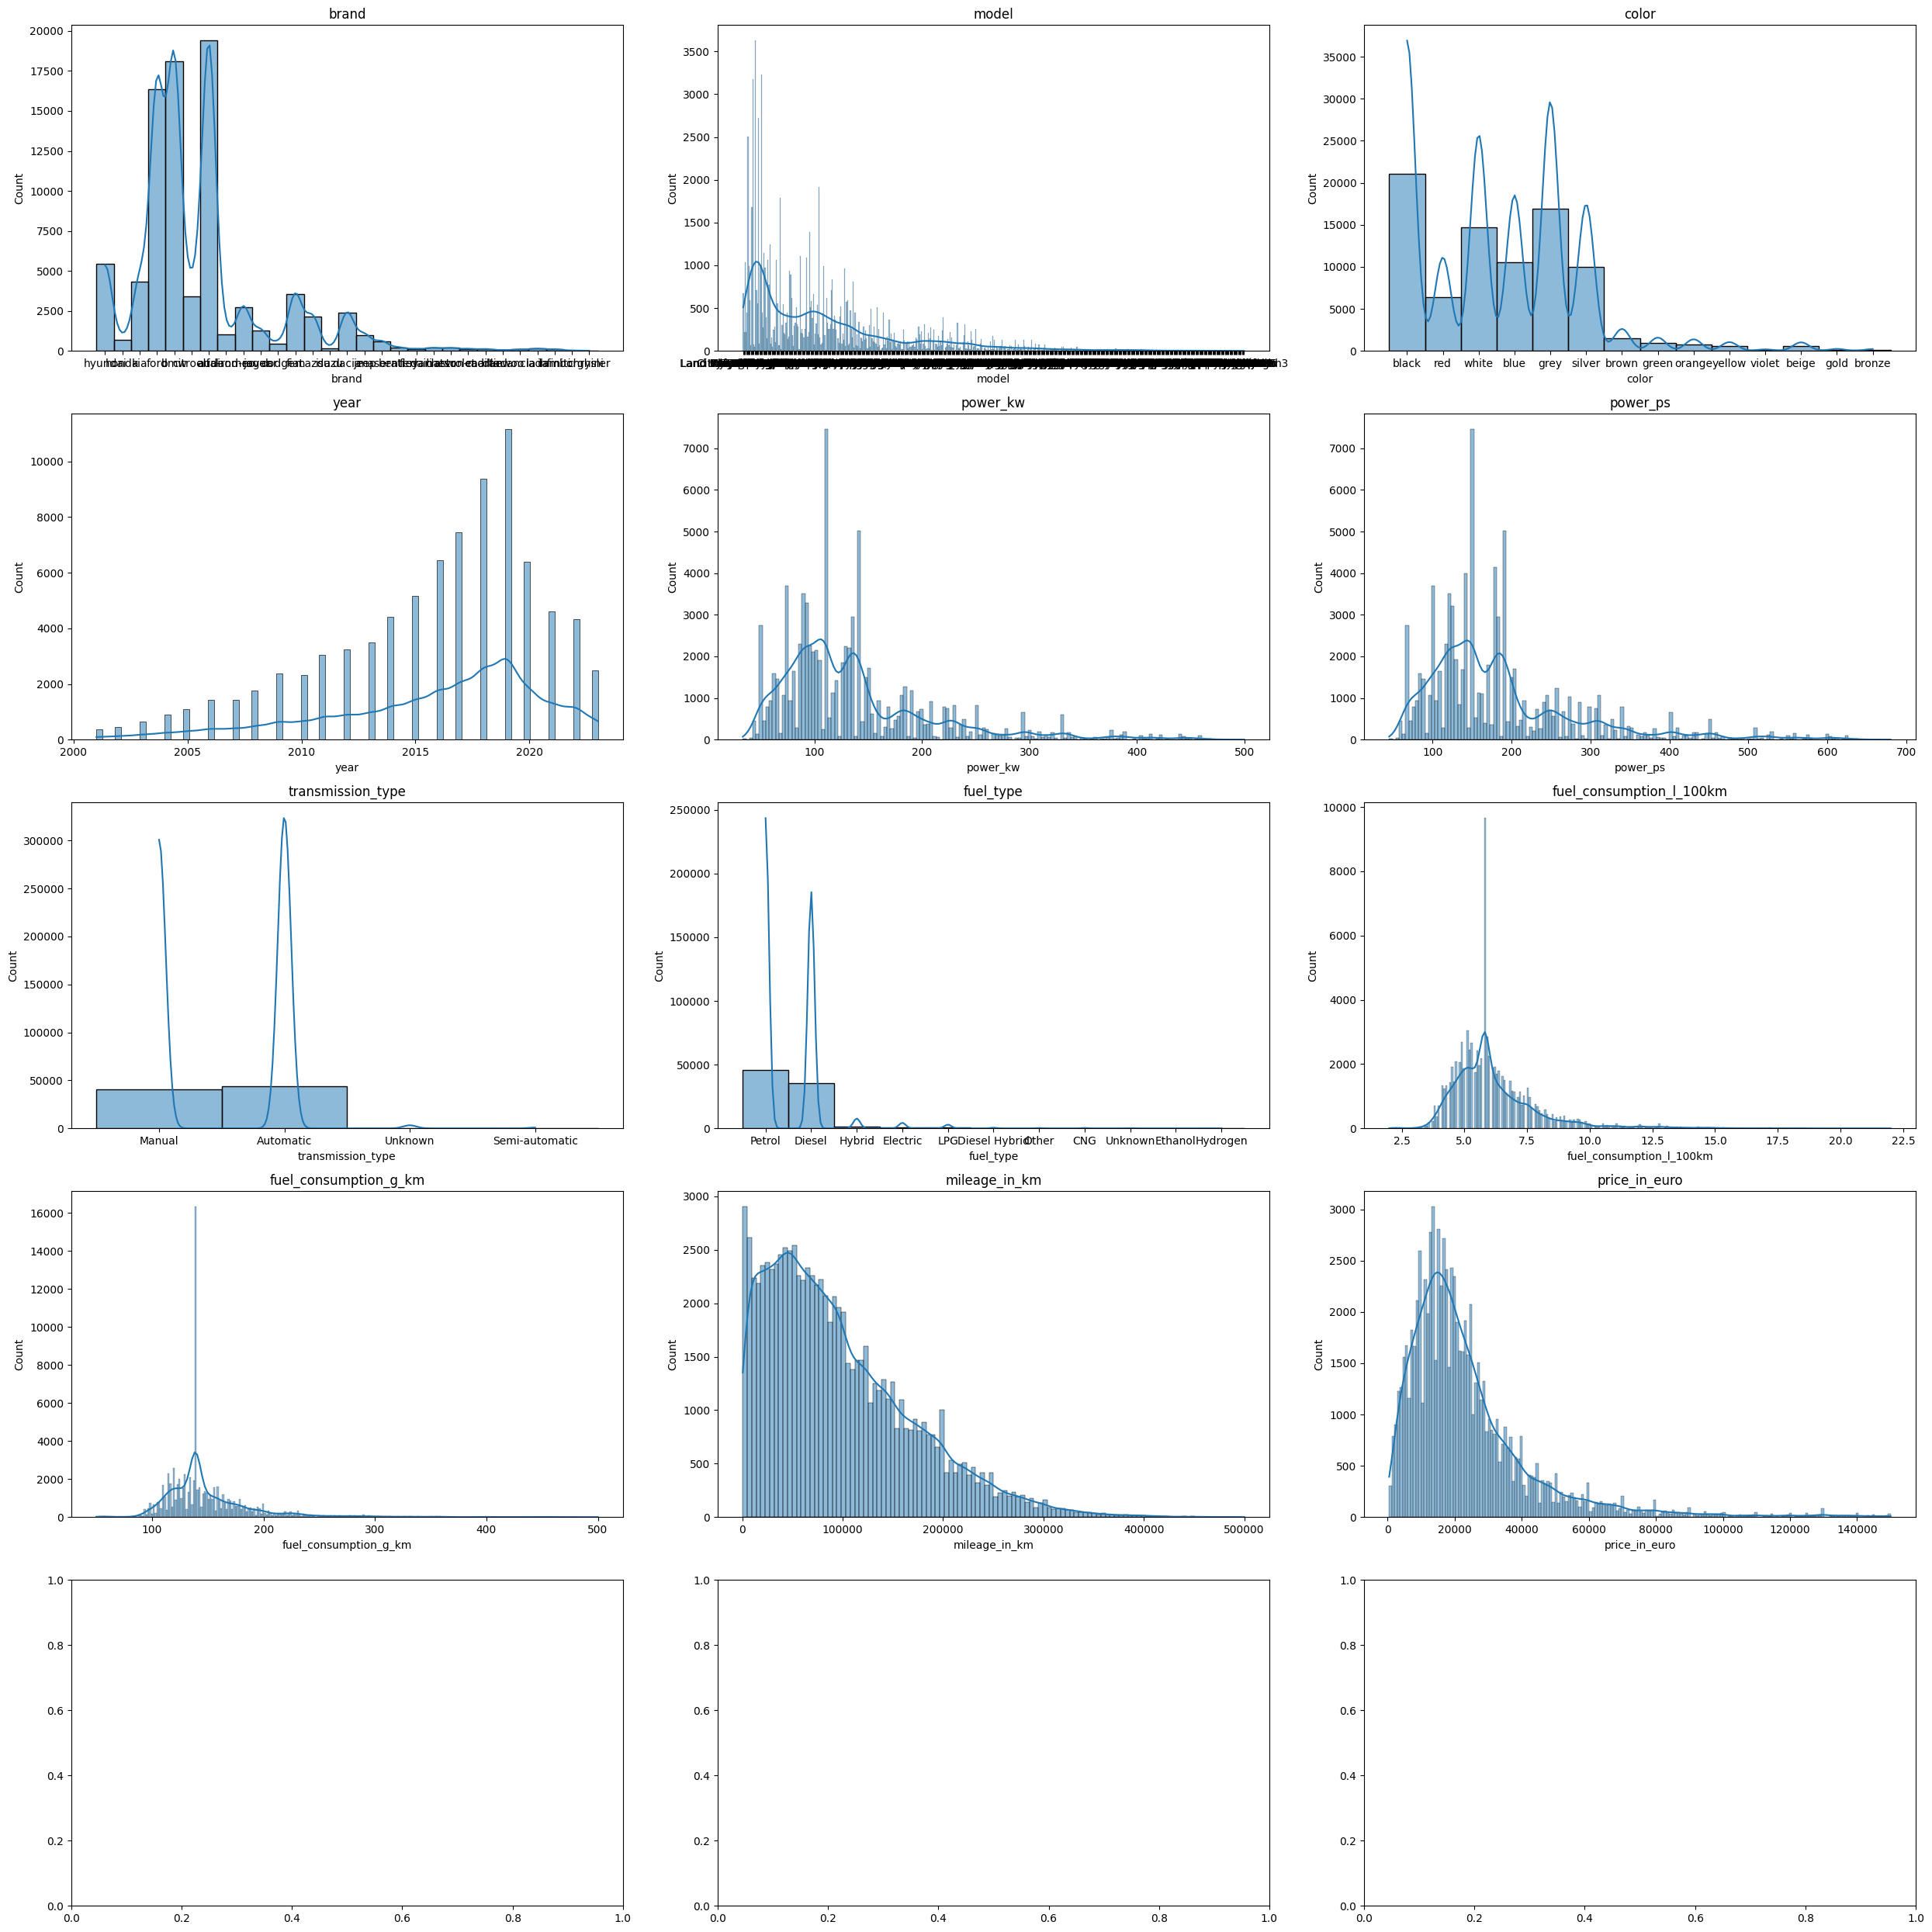

In [ ]:
fig, ax = plt.subplots(5, 3, figsize=(25, 25))

for col, ax in zip(df.columns, ax.flatten()):
    sns.histplot(df[col], ax=ax, kde=True)
    ax.set_title(col)

plt.tight_layout()
plt.show()


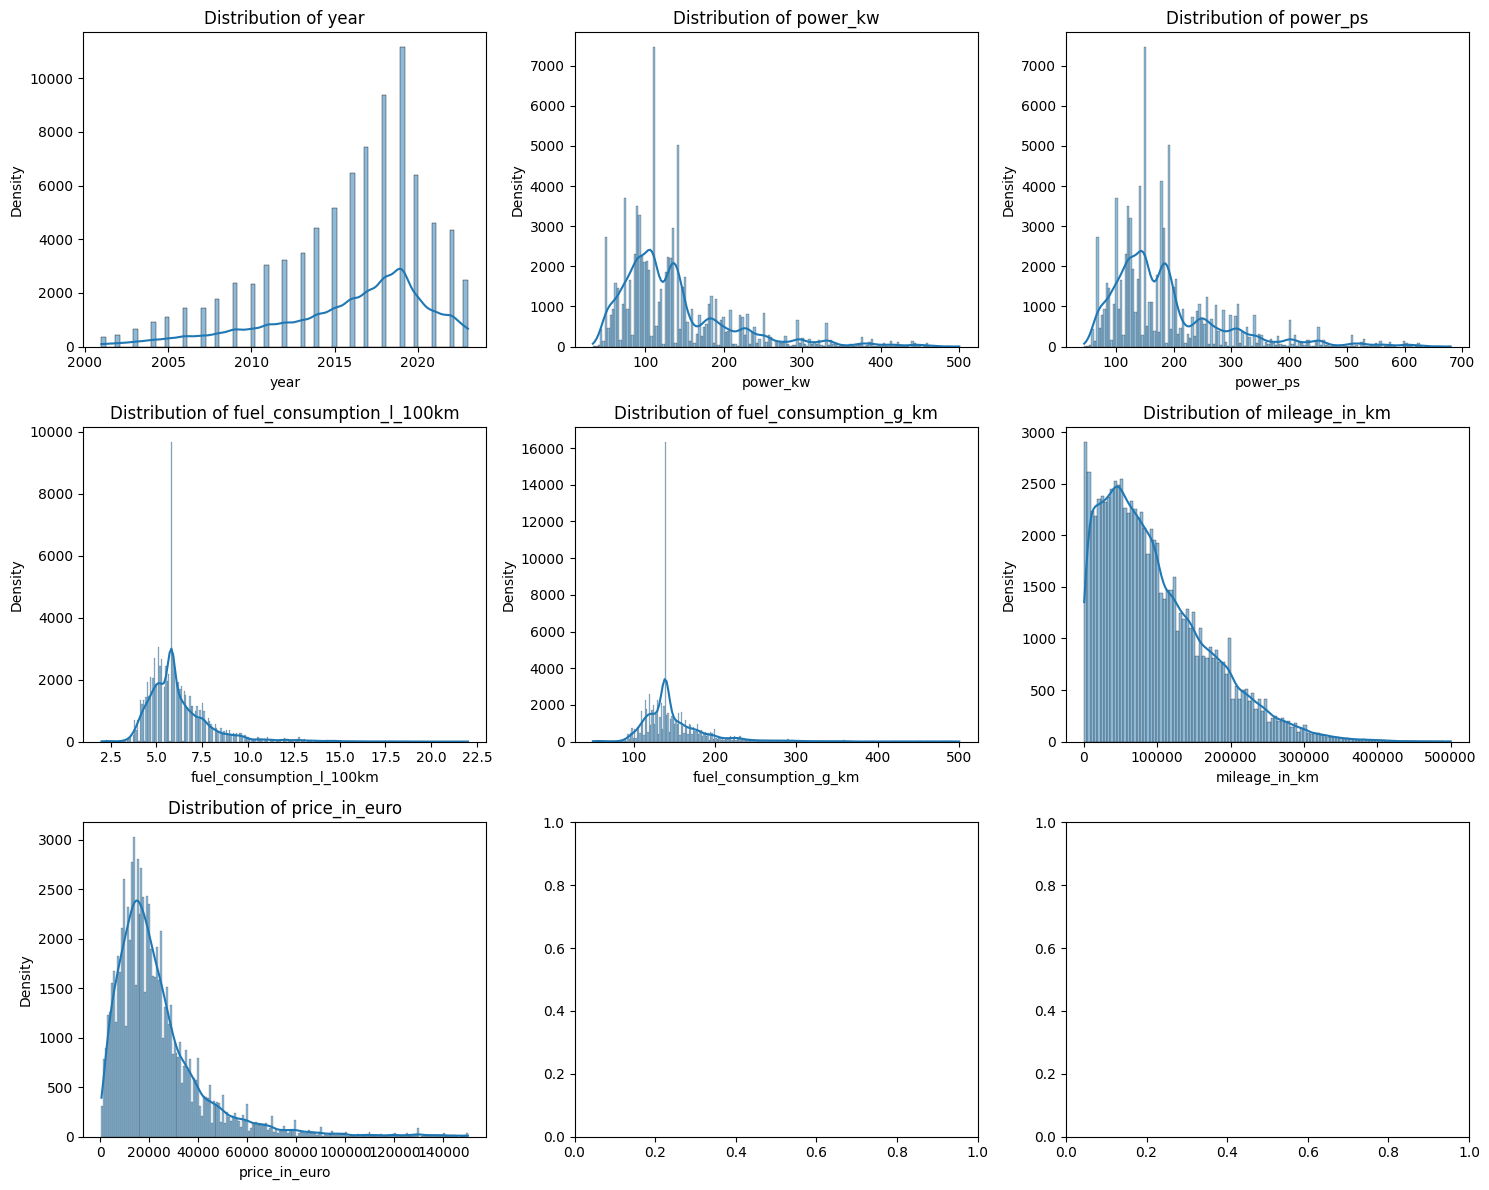

In [ ]:
    numerical_cols = df.select_dtypes(include=['number']).columns
    n_cols = 3 # Adjust as needed for desired layout
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols # Calculate rows dynamically
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    axes = axes.flatten() # Flatten the 2D array of axes for easy iteration
    for i, col in enumerate(numerical_cols):
        sns.histplot(data=df, x=col, kde=True, ax=axes[i]) # Using histplot with kde=True
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Density') # Or 'Count' if kde=False

    plt.tight_layout()
    plt.show()

<Axes: xlabel='mileage_in_km', ylabel='Density'>

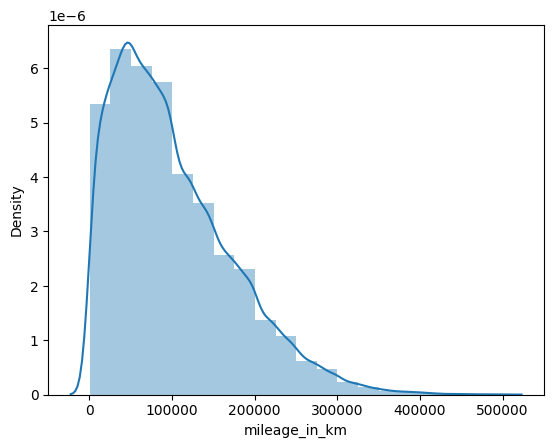

In [ ]:
sns.distplot(two['mileage_in_km'],bins=20)


<Axes: xlabel='price_in_euro', ylabel='Density'>

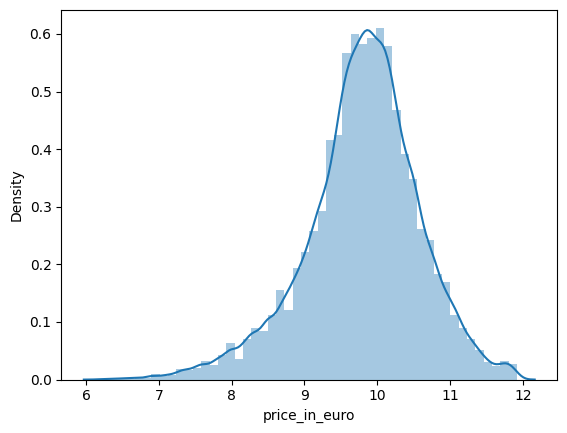

In [ ]:
sns.distplot(np.log(df['price_in_euro']))

<Axes: xlabel='mileage_in_km', ylabel='Density'>

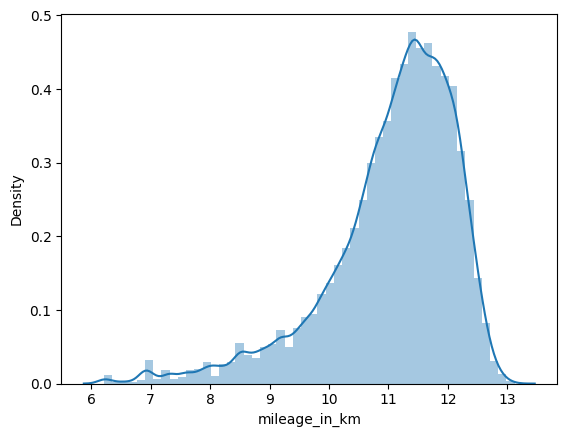

In [ ]:
sns.distplot(np.log(df['mileage_in_km']))

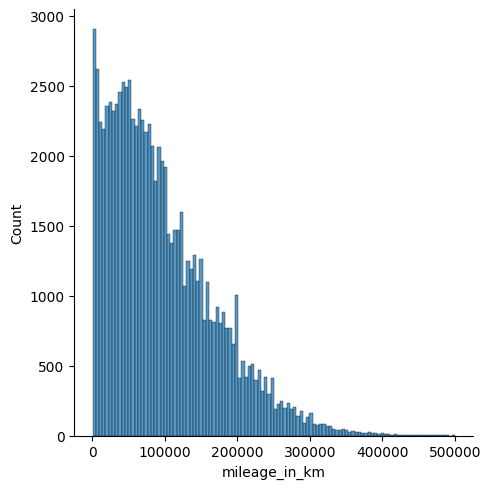

In [ ]:
sns.displot(df['mileage_in_km'])

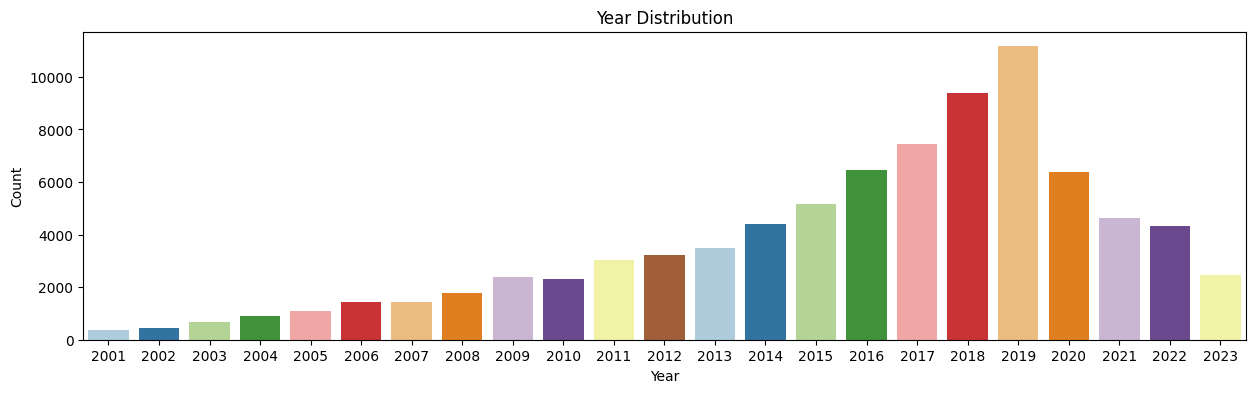

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(x=df['year'],palette="Paired")
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year Distribution')
plt.show()

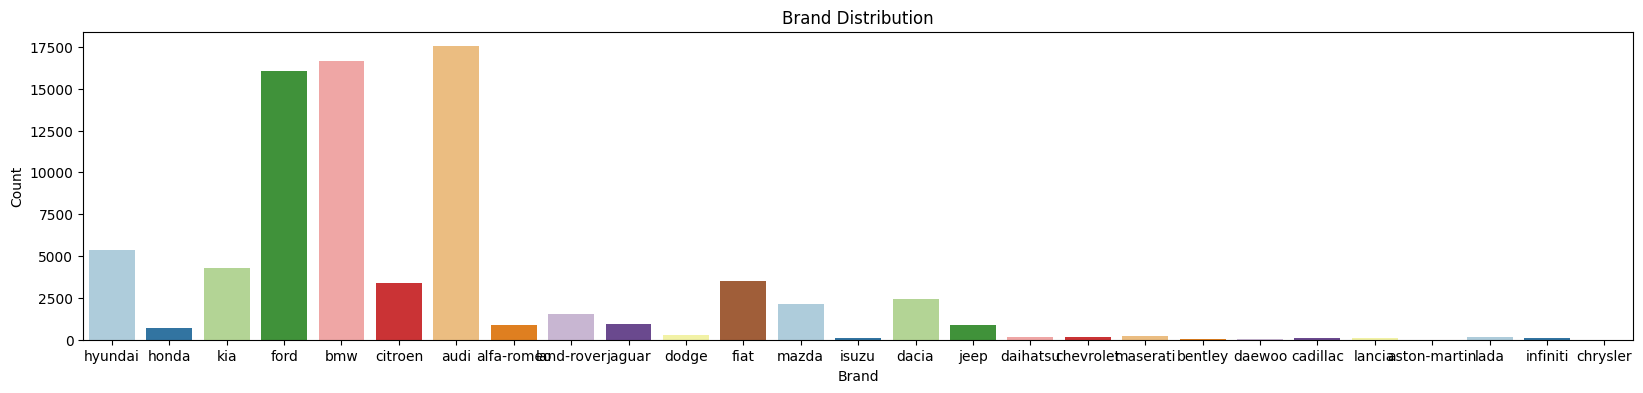

In [ ]:
plt.figure(figsize=(20,4))
sns.countplot(x=two['brand'],palette="Paired")
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Brand Distribution')
plt.show()#brand

ford and audi selled more

Bivariant

<Axes: title={'center': 'Brand Distribution'}, xlabel='price_in_euro'>

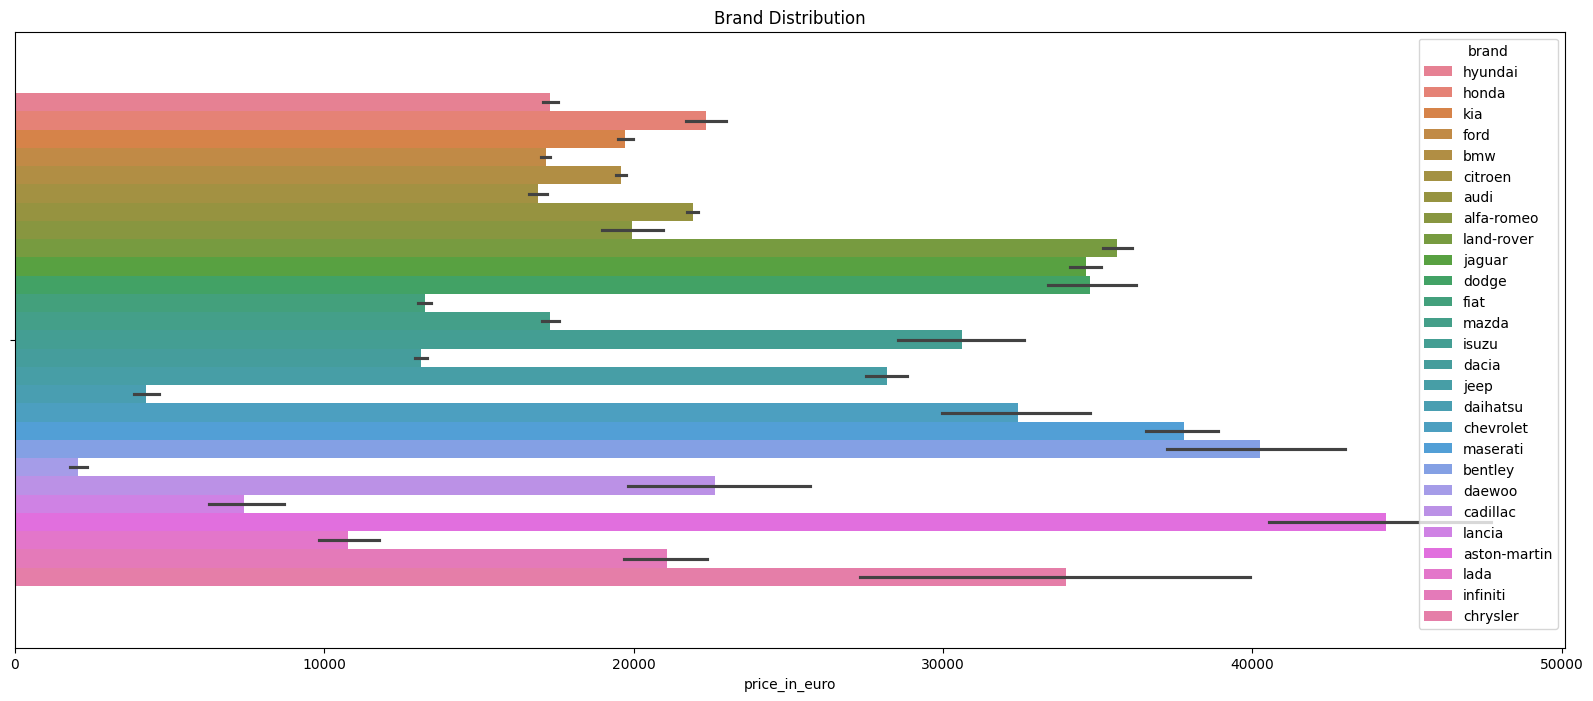

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Brand Distribution')
sns.barplot(x=two['price_in_euro'],hue=two['brand'])

<Axes: title={'center': 'Color Distribution'}, xlabel='price_in_euro'>

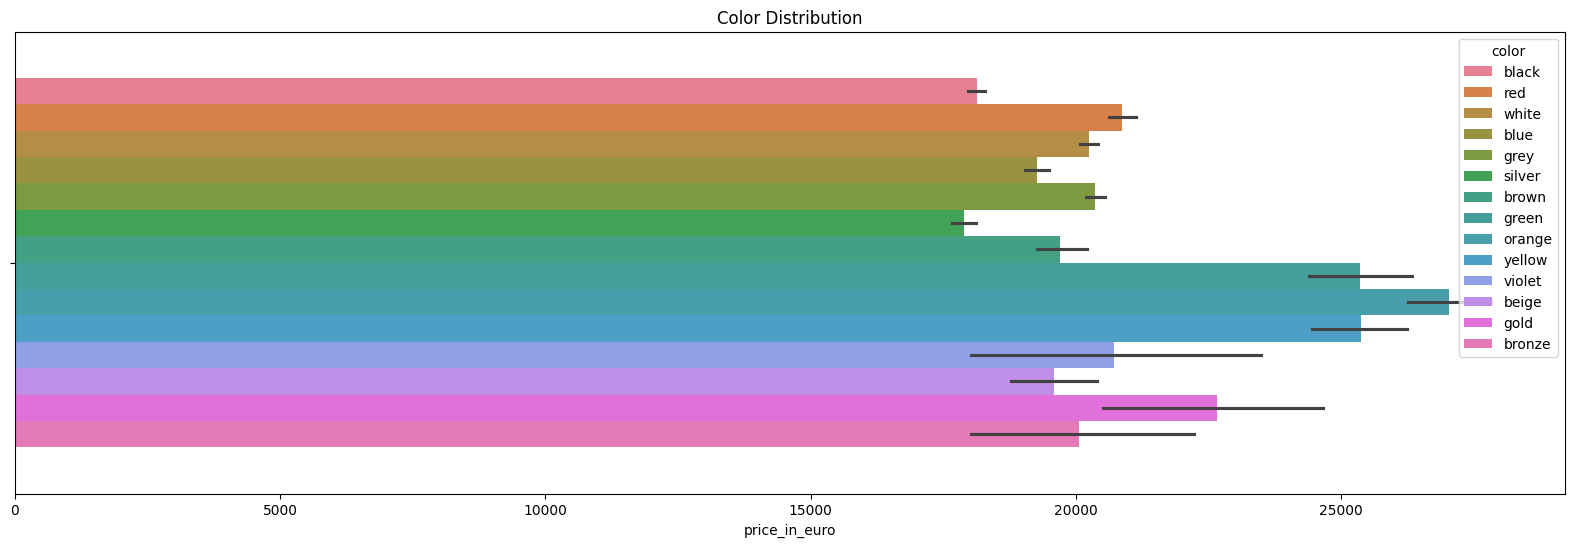

In [ ]:
plt.figure(figsize=(20,6))
plt.title('Color Distribution')
sns.barplot(x=two['price_in_euro'],hue=two['color'])

<Axes: xlabel='transmission_type', ylabel='price_in_euro'>

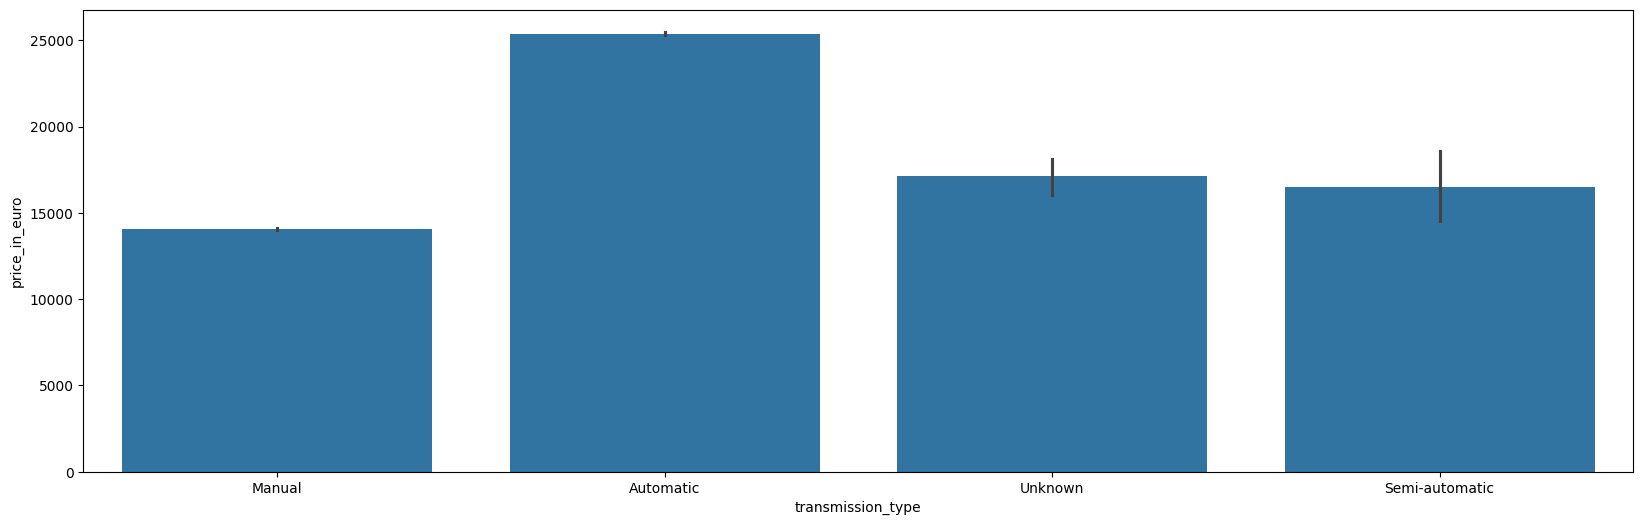

In [ ]:
plt.figure(figsize=(20,6))

sns.barplot(x=two['transmission_type'],y=two['price_in_euro'])

<Axes: xlabel='fuel_type', ylabel='price_in_euro'>

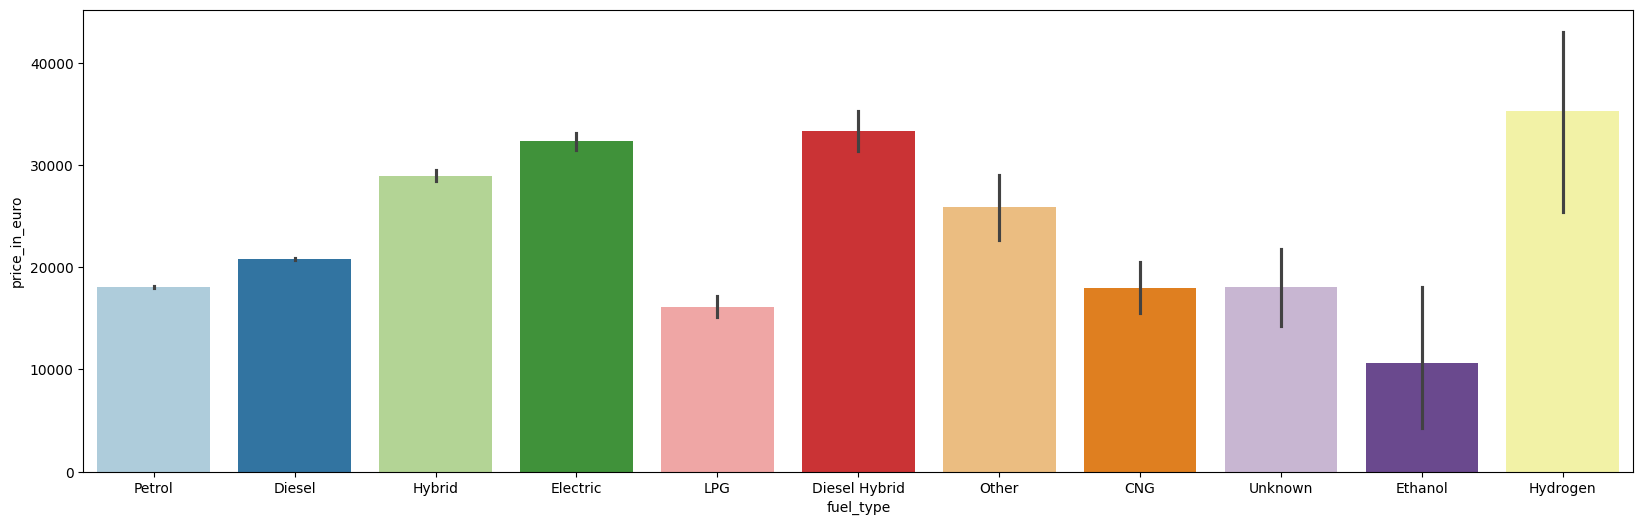

In [72]:
plt.figure(figsize=(20,6))

sns.barplot(x=two['fuel_type'],y=two['price_in_euro'],palette="Paired")

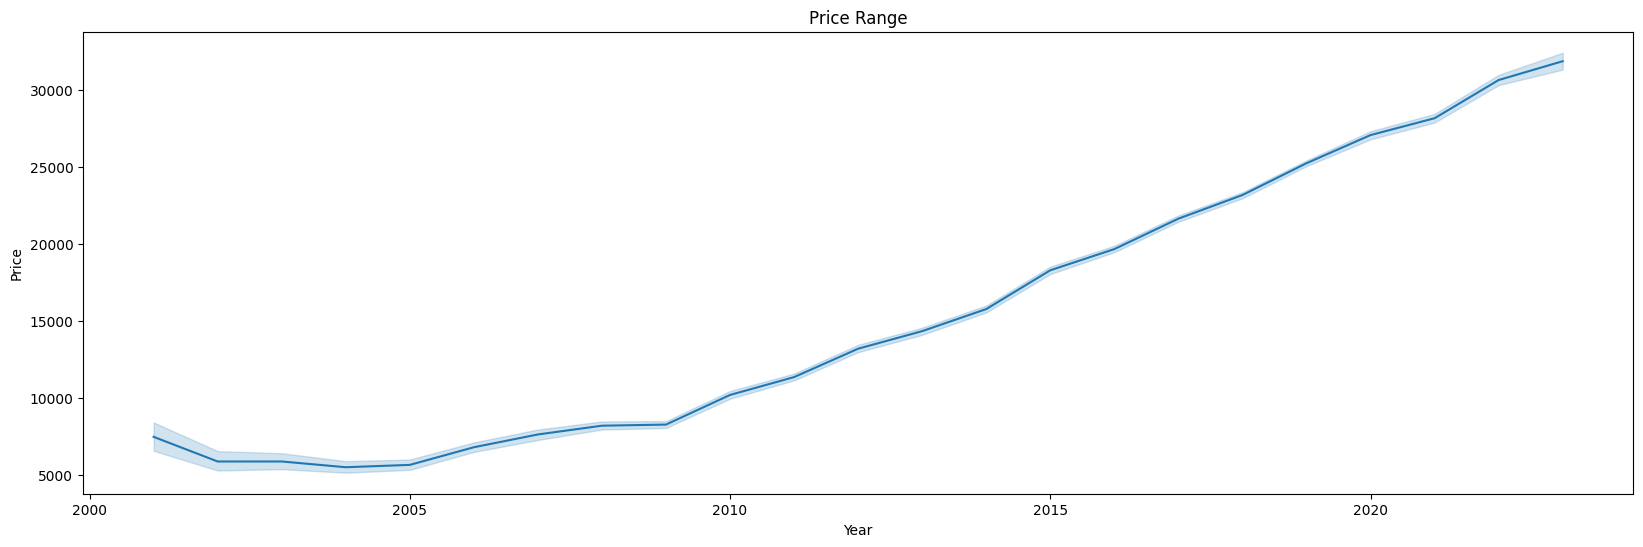

In [ ]:
plt.figure(figsize=(20,6))
sns.lineplot(x=two['year'],y=two['price_in_euro'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price Range')
plt.show()

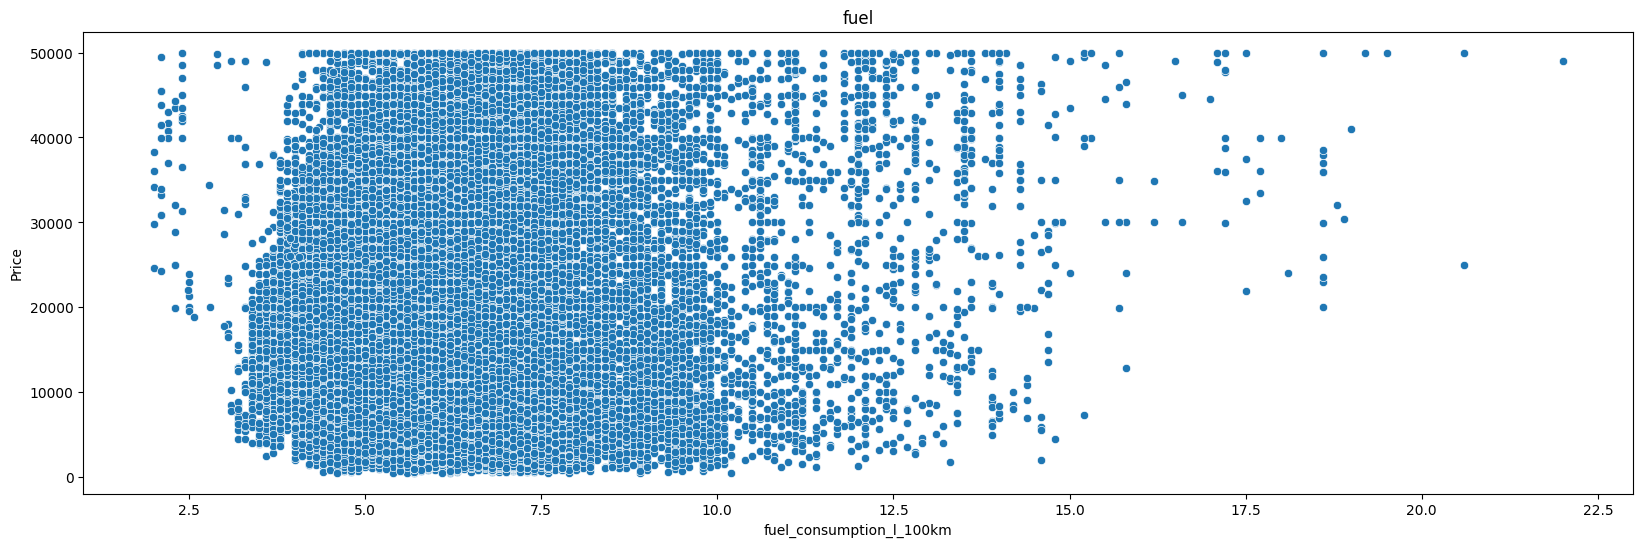

In [ ]:
plt.figure(figsize=(20,6))
sns.scatterplot(x=two['fuel_consumption_l_100km'],y=two['price_in_euro'])
plt.xlabel('fuel_consumption_l_100km')
plt.ylabel('Price')
plt.title('fuel')
plt.show()

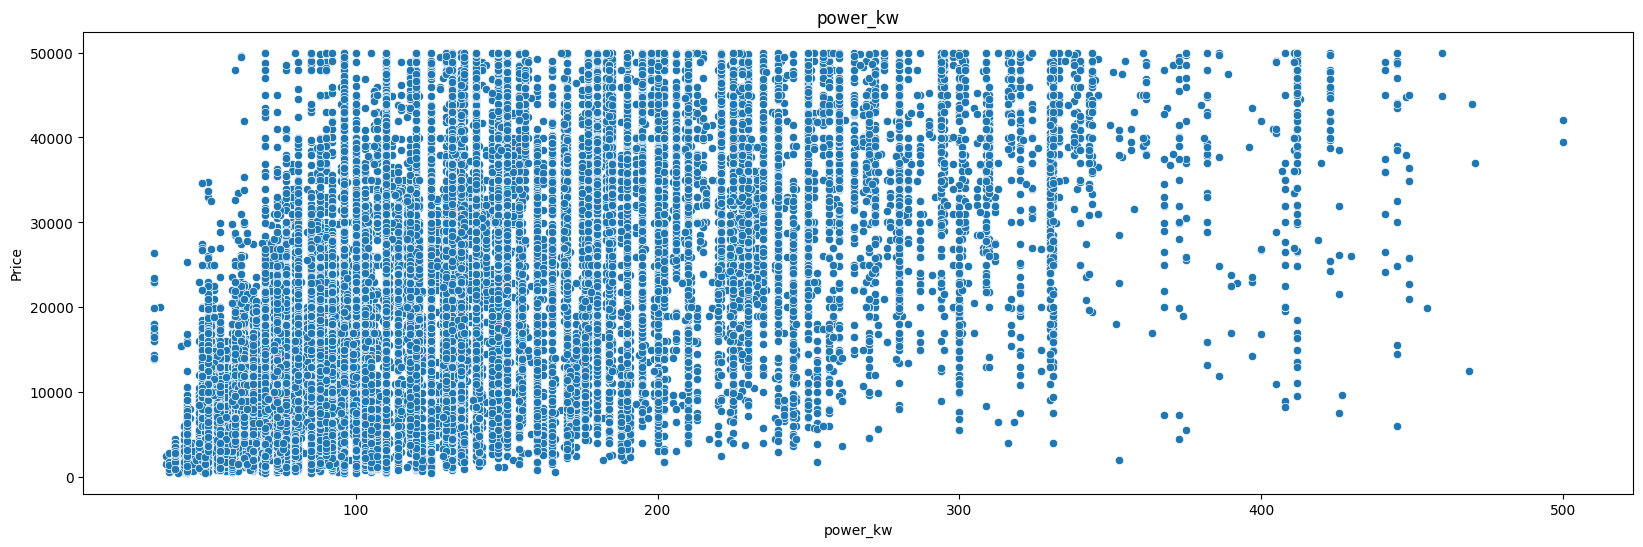

In [ ]:
plt.figure(figsize=(20,6))
sns.scatterplot(x=two['power_kw'],y=two['price_in_euro'])
plt.xlabel('power_kw')
plt.ylabel('Price')
plt.title('power_kw')
plt.show()

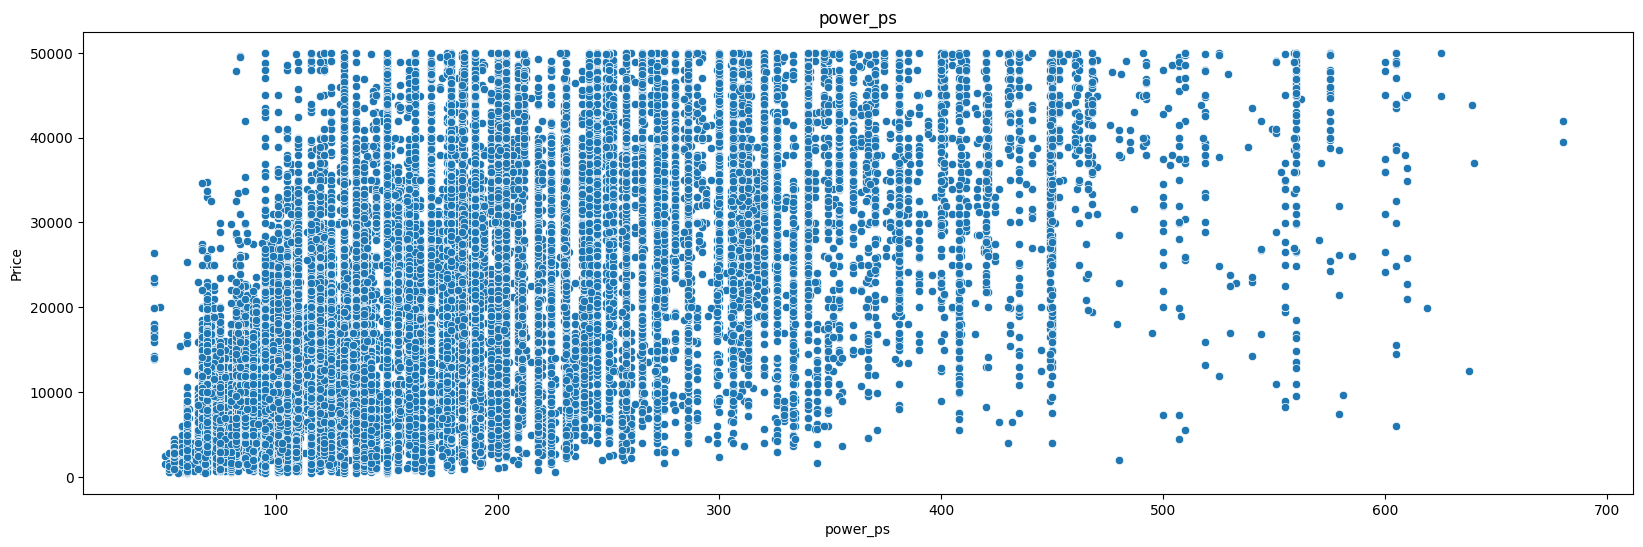

In [ ]:
plt.figure(figsize=(20,6))
sns.scatterplot(x=two['power_ps'],y=two['price_in_euro'])
plt.xlabel('power_ps')
plt.ylabel('Price')
plt.title('power_ps')
plt.show()

In [ ]:
df.columns

Index(['brand', 'model', 'color', 'year', 'power_kw', 'power_ps',
       'transmission_type', 'fuel_type', 'fuel_consumption_l_100km',
       'fuel_consumption_g_km', 'mileage_in_km', 'price_in_euro'],
      dtype='object')

<Axes: xlabel='year', ylabel='price_in_euro'>

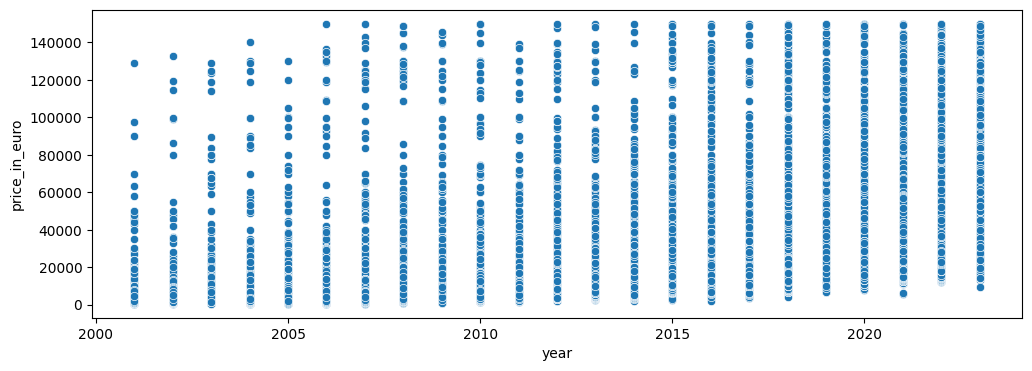

In [ ]:
plt.figure(figsize=(12,4))
sns.scatterplot(y=df['price_in_euro'],x=df['year'])


Text

In [ ]:
df.sort_values(by='mileage_in_km',ascending=False).head(2)

,brand,model,color,year,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,price_in_euro
14864,kia,Kia Carens,white,2014,85.0,116.0,Manual,Diesel,4.8,125.0,500000.0,5000.0
79677,audi,Audi A4,silver,2001,85.0,116.0,Automatic,Diesel,5.3,143.0,500000.0,900.0


In [ ]:
df.sort_values(by='price_in_euro',ascending=False).head(2)

,brand,model,color,year,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,price_in_euro
36179,ferrari,Ferrari 458,yellow,2010,419.0,570.0,Automatic,Petrol,5.8,139.0,64000.0,150000.0
41466,bentley,Bentley Bentayga,grey,2017,447.0,608.0,Automatic,Petrol,13.1,296.0,73000.0,150000.0


In [ ]:
df.groupby('brand')['price_in_euro'].mean().sort_values(ascending=False).head(2)

,price_in_euro
brand,
lamborghini,123984.920000
ferrari,118301.637097


In [ ]:
ferrari=df[df['brand']=='ferrari'].sort_values(by='price_in_euro',ascending=False)
ferrari.head(2)

,brand,model,color,year,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,price_in_euro
36179,ferrari,Ferrari 458,yellow,2010,419.0,570.0,Automatic,Petrol,5.8,139.0,64000.0,150000.0
46078,ferrari,Ferrari F430,red,2006,360.0,489.0,Automatic,Petrol,18.3,420.0,18000.0,149988.0


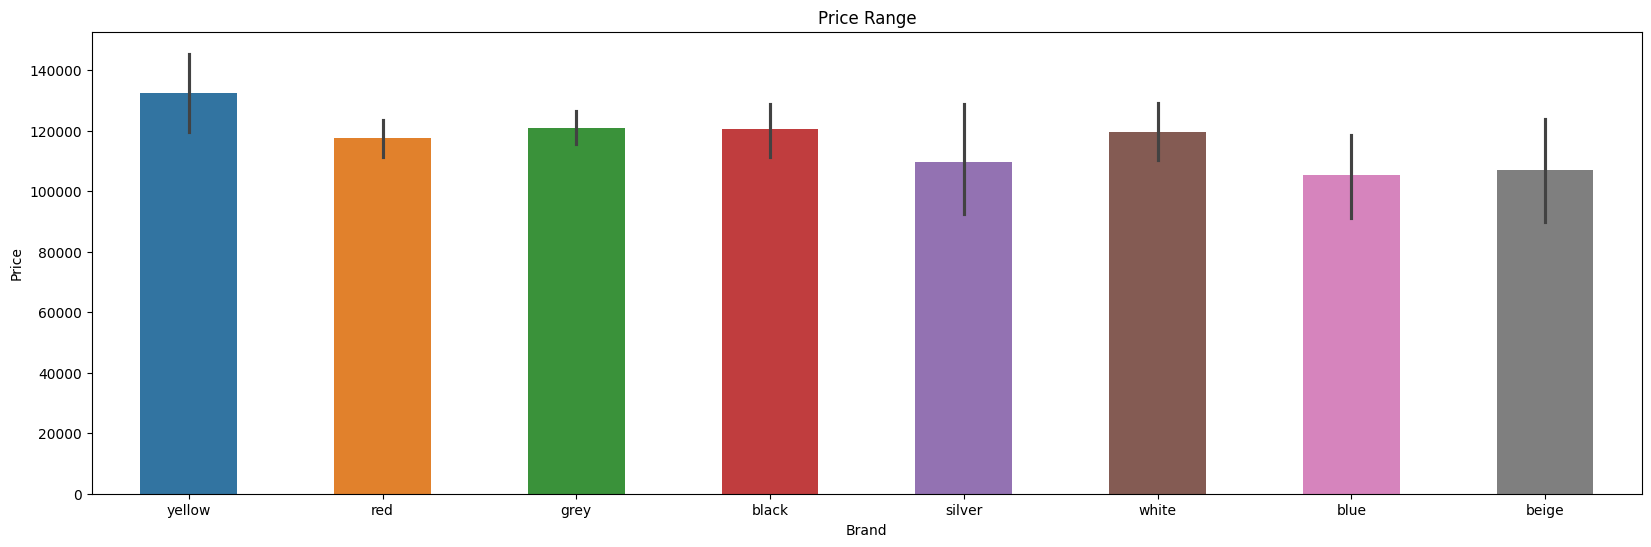

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(x=ferrari['color'],y=ferrari['price_in_euro'],hue=ferrari['color'],width=0.5)
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Price Range')
plt.show()